## Github: https://github.com/Rorn001/Econ470.git 

## Enrollment Data

In [2]:
# import necessary packages for coping with the data and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
#| echo: false
data = pd.read_csv(r'data\output\enrollment data-Py\full_ma_data.csv', 
                   encoding='ISO-8859-1')


C:\Users\huang\AppData\Local\Temp\ipykernel_9152\1604708242.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'data\output\enrollment data-Py\full_ma_data.csv',


### How many observations exist in your current dataset?

In [4]:
# number of observations
f'total number of observations is {data.shape[0]}'

19126783

## How many different plan_types exist in the data?

In [7]:
# number of distinct values in plan_type
f'the number of distinct values in plan_type is {data.plan_type.nunique()}'

'the number of distinct values in plan_type is 26'

In [9]:
# list all distinct values in plan_type
data['plan_type'].unique()

array(['HCPP - 1833 Cost', 'Pilot',
       'Employer/Union Only Direct Contract PDP', 'Employer Direct PFFS',
       'Local PPO', 'HMO/HMOPOS', 'National PACE',
       'Continuing Care Retirement Community', '1876 Cost', 'PFFS',
       'PSO (State License)', 'MA Health Senior Care Options',
       'MN Disability Health Options', 'MN Senior Health Options', 'SHMO',
       'PSO (Federal Waiver of State License)', 'WI Partnership Program',
       'ESRD I', 'ESRD II', 'MSA', 'MSA Demo', 'Regional PPO',
       'Medicare Prescription Drug Plan',
       'Employer/Union Only Direct Contract PFFS', nan, 'RFB PFFS',
       'Medicare-Medicaid Plan HMO/HMOPOS'], dtype=object)

### Provide a table of the count of plans under each plan type in each year. 

In [46]:
# drop year 2007 to 2009 from the data (one line code) and reproduce table 1
data1 = data[(data['year'] != 2007) 
             & (data['year'] != 2008) 
             & (data['year'] != 2009)]

table1 = pd.crosstab(data1['plan_type'], data1['year'])
table1

year,2010,2011,2012,2013,2014,2015
plan_type,,,,,,
1876 Cost,6035,6851,7633,7731,7069,7157
Continuing Care Retirement Community,142,0,0,0,0,0
ESRD I,117,0,0,0,0,0
ESRD II,8,0,0,0,0,0
Employer/Union Only Direct Contract PDP,28700,28697,28669,25526,25528,25630
Employer/Union Only Direct Contract PFFS,3332,3329,3323,0,0,0
HCPP - 1833 Cost,3604,11,11,10,9,9
HMO/HMOPOS,506802,528473,507272,530909,523304,479275
Local PPO,417551,515700,636701,633884,664716,704993


### Remove all special needs plans (SNP), employer group plans (eghp), and all “800-series” plans. 

In [47]:
# drop observations that have ehgp, snp equal to yes
data2 = data1[(data1['eghp'] != 'Yes') & (data1['snp'] != 'Yes')]
# drop observatinos that have planid between 800 to 899
data3 = data2[(data2['planid'] < 800) | (data2['planid'] > 899)]
table3 = pd.crosstab(data3['plan_type'], data3['year'])
table3
# most of plans that are dropped do not have much enrollment between 2010 and 2015

year,2010,2011,2012,2013,2014,2015
plan_type,,,,,,
1876 Cost,4923,5829,6647,6759,6207,6329
Continuing Care Retirement Community,64,0,0,0,0,0
ESRD I,117,0,0,0,0,0
HMO/HMOPOS,34460,33931,37551,37179,38893,36588
Local PPO,11652,13874,17030,17089,17169,16728
MSA,68,131,132,145,163,232
Medicare Prescription Drug Plan,391205,295458,289044,278091,301082,269153
Medicare-Medicaid Plan HMO/HMOPOS,0,0,0,265,1319,4130
National PACE,717,781,858,953,1118,1216


### Merge the contract service area data to the enrollment data, and restrict the data only to contracts that are approved in their respective counties. Limiting your dataset only to plans with non-missing enrollment data, provide a graph showing the average number of Medicare Advantage enrollees per county from 2010 to 2015.

In [12]:
# in data3, drop any observations with NaH in planid and fips column
data4 = data3.dropna(subset=['planid', 'fips'])

In [13]:
# read csv
#| echo: false
area_data = pd.read_csv('data\output\contract_service_area.csv', 
                        encoding='ISO-8859-1')

C:\Users\huang\AppData\Local\Temp\ipykernel_9152\2472351519.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  area_data = pd.read_csv('data\output\contract_service_area.csv', encoding='ISO-8859-1')


In [16]:
# for area_data, select only year from 2010 to 2015
#| echo: false
area_data1 = area_data[(area_data['year'] >= 2010) 
                       & (area_data['year'] <= 2015)]
area_data1.head(5)

,contractid,org_name,org_type,plan_type,partial,eghp,ssa,fips,county,state,notes,year
889797,90091,UNITED MINE WORKERS OF AMERICA HEALTH & RETIRE...,HCPP - 1833 Cost,HCPP - 1833 Cost,NaN,NaN,NaN,NaN,NaN,NaN,"Covers the entire US, all States and Counties",2010
889798,E5088,DESERET HEALTHCARE EMPLOYEE BENEFITS TRUST,Employer/Union Only Direct Contract PFFS,Employer/Union Only Direct Contract PFFS,NaN,NaN,1000.0,1001.0,Autauga,AL,NaN,2010
889799,E5088,DESERET HEALTHCARE EMPLOYEE BENEFITS TRUST,Employer/Union Only Direct Contract PFFS,Employer/Union Only Direct Contract PFFS,NaN,NaN,1010.0,1003.0,Baldwin,AL,NaN,2010
889800,E5088,DESERET HEALTHCARE EMPLOYEE BENEFITS TRUST,Employer/Union Only Direct Contract PFFS,Employer/Union Only Direct Contract PFFS,NaN,NaN,1020.0,1005.0,Barbour,AL,NaN,2010
889801,E5088,DESERET HEALTHCARE EMPLOYEE BENEFITS TRUST,Employer/Union Only Direct Contract PFFS,Employer/Union Only Direct Contract PFFS,NaN,NaN,1030.0,1007.0,Bibb,AL,NaN,2010


In [17]:
# inner join data4 and area_data based on contract_id, fips, and year
enroll_data = pd.merge(data4, area_data1, 
                       on=['contractid', 'fips', 'year'], 
                       how='inner')

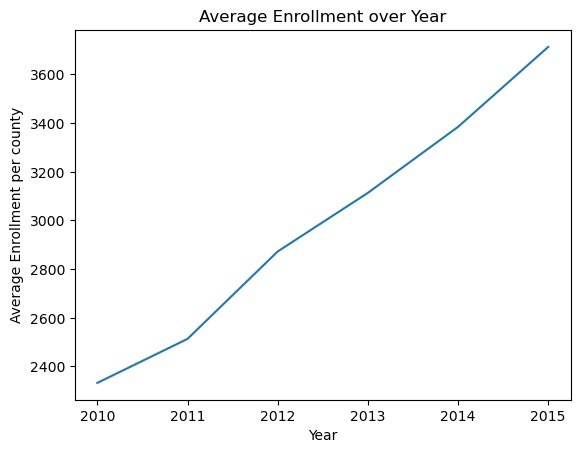

In [18]:
# use agg function to calculate teh sum of observation per year
data6 = enroll_data.groupby(['year']).agg({'avg_enrollment': 'sum'})
data6 = data6.reset_index()

# find the number of distinct county in each year
data7 = enroll_data.groupby(['year']).agg({'fips': 'nunique'})
data7 = data7.reset_index()

# marge data6 and data7 and create a new column called 'avg_enrollment' 
#by dividing the number of observations by the number of distinct counties
data8 = pd.merge(data6, data7, on='year', how='inner')
data8['avg_enrollment'] = data8['avg_enrollment'] / data8['fips']

# plot the avg_enrollment over year using matplotlib
plt.plot(data8['year'], data8['avg_enrollment'])
plt.xlabel('Year')
plt.ylabel('Average Enrollment per county')
plt.title('Average Enrollment over Year')
plt.show()

## Premium Data

In [19]:
# read csv
pre_data = pd.read_csv('data\output\plan_premiums.csv', 
                       encoding='ISO-8859-1')
pen_data = pd.read_csv('data\output\ma_penetration.csv', 
                       encoding='ISO-8859-1')

### Merge the plan characteristics data to the dataset you created in Step 5 above. Note that you’ll need to join the Market Penetration Data in order to get the information you need to merge the plan characteristics. Provide a graph showing the average premium over time.

In [20]:
# focus on 2010 to 2015
pre_data = pre_data[(pre_data['year'] >= 2010) 
                    & (pre_data['year'] <= 2015)]
pen_data = pen_data[(pen_data['year'] >= 2010) 
                    & (pen_data['year'] <= 2015)]

# merge pre_data and pen_data based on state and county
plan_data = pd.merge(pre_data, pen_data, 
                     on=['state', 'county','year'], 
                     how='left')

In [22]:
# merge pre_data and pen_data based on state and county
#| echo: false
plan_data = pd.merge(pre_data, pen_data, 
                     on=['state', 'county','year'], 
                     how='left')
plan_data.head(5)

,contractid,planid,state,county,premium,premium_partc,premium_partd_basic,premium_partd_supp,premium_partd_total,partd_deductible,...,max_eligibles,first_eligibles,last_eligibles,avg_enrolled,sd_enrolled,min_enrolled,max_enrolled,first_enrolled,last_enrolled,ssa
0,H0104,4,Alabama,Autauga,41.0,23.3,17.7,0.0,17.7,0.0,...,8302.0,8056.0,8302.0,2194.583333,61.780342,2061.0,2266.0,2061.0,2266.0,1000.0
1,H0104,8,Alabama,Autauga,142.0,107.7,26.5,7.8,34.3,0.0,...,8302.0,8056.0,8302.0,2194.583333,61.780342,2061.0,2266.0,2061.0,2266.0,1000.0
2,H0104,2,Alabama,Autauga,0.0,0.0,0.0,0.0,0.0,0.0,...,8302.0,8056.0,8302.0,2194.583333,61.780342,2061.0,2266.0,2061.0,2266.0,1000.0
3,H2762,15,Alabama,Autauga,80.0,NaN,NaN,NaN,NaN,NaN,...,8302.0,8056.0,8302.0,2194.583333,61.780342,2061.0,2266.0,2061.0,2266.0,1000.0
4,H2762,19,Alabama,Autauga,135.0,NaN,NaN,NaN,NaN,NaN,...,8302.0,8056.0,8302.0,2194.583333,61.780342,2061.0,2266.0,2061.0,2266.0,1000.0


In [24]:
# merge plan_data and enroll_data based on fips, state, and county
#| echo: false
fdata = pd.merge(enroll_data, plan_data, 
                 on=['fips', 'year','contractid','planid'], 
                 how='left')
fdata.head(5)

,Unnamed: 0,contractid,planid,org_type_x,plan_type_x,partd,snp,eghp_x,org_name_x,org_marketing_name,...,max_eligibles,first_eligibles,last_eligibles,avg_enrolled,sd_enrolled,min_enrolled,max_enrolled,first_enrolled,last_enrolled,ssa
0,5884037,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,...,213944.0,208936.0,213944.0,70644.166667,1459.017218,67550.0,72408.0,67550.0,72408.0,45130.0
1,5884038,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,...,16300.0,16107.0,16230.0,1826.000000,65.203179,1668.0,1880.0,1668.0,1863.0,45170.0
2,5884039,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,...,34335.0,33333.0,34335.0,5642.166667,141.842315,5286.0,5753.0,5286.0,5725.0,45180.0
3,5884041,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,...,1532.0,1504.0,1525.0,256.750000,10.163437,232.0,264.0,232.0,263.0,45210.0
4,5884042,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,...,6887.0,6807.0,6887.0,831.333333,33.578492,742.0,858.0,742.0,858.0,45260.0


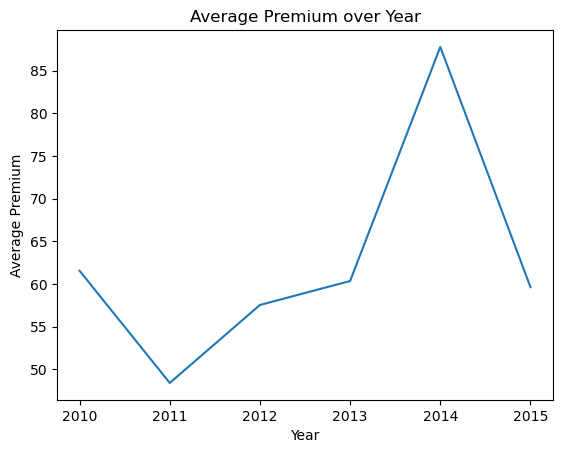

In [25]:
# calculate the average premium per year
data9 = fdata.groupby(['year']).agg({'premium': 'mean'})
data9 = data9.reset_index()
# plot the average premium over year using matplotlib
plt.plot(data9['year'], data9['premium'])
plt.xlabel('Year')
plt.ylabel('Average Premium')
plt.title('Average Premium over Year')
plt.show()


### Provide a graph showing the percentage of $0 premium plans over time.

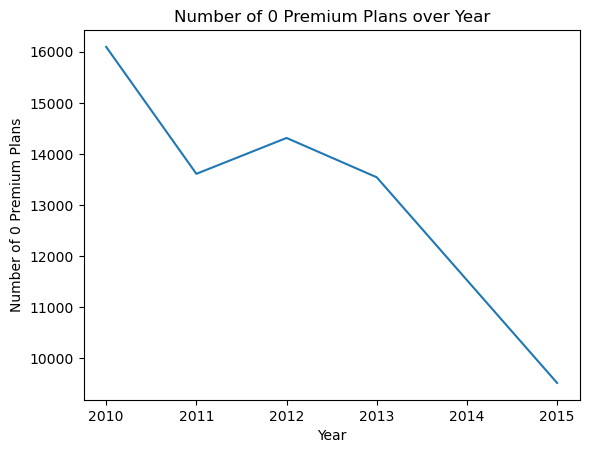

In [26]:
# calculate the number of 0 premium plans per year
data10 = fdata[fdata['premium'] == 0]
data10 = data10.groupby(['year']).agg({'premium': 'count'})
data10 = data10.reset_index()
# plot the number of 0 premium plans over year using matplotlib
plt.plot(data10['year'], data10['premium'])
plt.xlabel('Year')
plt.ylabel('Number of 0 Premium Plans')
plt.title('Number of 0 Premium Plans over Year')
plt.show()

## Summary Questions

### Why did we drop the “800-series” plans?


In [48]:
egwp=data1[(data1['planid'] >= 800) & (data1['planid'] <= 899)]
egwp=egwp[(egwp['eghp'] != 'Yes') & (egwp['snp'] != 'Yes')]
pd.crosstab(egwp['plan_type'], egwp['year'])

year,2011
plan_type,
PFFS,1774


800-series plans are coded as the employer group waiver plans, but some of them are not coded as true in the egwp column. As shown in the above tabel, there are 1774 plans that are 800-series plans but not egwp. Therefore, we drop the 800-series plans to exclude all egwp plans. 

### Why do so many plans charge a $0 premium? What does that really mean to a beneficiary?

0 premium plans may be designed to provide health insurance to those who cannot afford other expensive plans or to those who think they are healthy and do not need to pay for higher premium. It seems it is a good way to contain cost for the enrolles, but 0 premium plans may still result in high out-of-pocket cost due to high deductible, copayment, or coinsurance rate. Also those plans may have limited coverage and network, so out-of-network payment and surprsing bills could also occur.

### Briefly describe your experience working with these data (just a few sentences). Tell me one thing you learned and one thing that really aggravated you.

The most troublesome issue when dealing with these data is the size the data. It takes very long to load data, and there are raw data such that we have to spend quite a lot of time to clean it before any analysis. Sometimes my computer may run out of memory and I have to restart it.